In [1]:
#Download dữ liệu phân bón dried
!gdown --id 1Jqb1nXv-fNqXGYxsShfSdvm0F2kabNhW
#Download dữ liệu phân bón fresh
!gdown --id 1Us68Nzzafwr1VPsYnYv-cEJZBmNJ3Ji3
#Download dữ liệu thành phần hóa học của phân bón
!gdown --id 1qdONOOyIcmJfR1vZSaGzIvHtyTg7ShfP

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Jqb1nXv-fNqXGYxsShfSdvm0F2kabNhW
To: /content/spectra_DG_Abs_STD_1100_2498nm_STD.xlsx
100% 2.07M/2.07M [00:00<00:00, 171MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Us68Nzzafwr1VPsYnYv-cEJZBmNJ3Ji3
To: /content/spectra_FH_Abs_STD_1100_2498nm_STD.xlsx
100% 2.17M/2.17M [00:00<00:00, 186MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
file_paths = [
    "/content/spectra_DG_Abs_STD_1100_2498nm_STD.xlsx",
    "/content/spectra_FH_Abs_STD_1100_2498nm_STD.xlsx",
    "/content/chemical_analysis.xlsx"
]

dried_spectra_df = pd.read_excel(file_paths[0])
fresh_spectra_df = pd.read_excel(file_paths[1])
chemical_df = pd.read_excel(file_paths[2])

In [4]:
dried_spectra = dried_spectra_df.values[:,1:]
fresh_spectra = fresh_spectra_df.values[:,1:]
chemical = chemical_df.values[:,1:]

In [5]:
def visualize_spectra(matrix, title):
    matrix_numeric = np.empty(matrix.shape)
    for i in range(matrix.shape[1]):
        matrix_numeric[:, i] = pd.to_numeric(matrix[:, i], errors='coerce')

    num_lines = matrix_numeric.shape[0]
    plt.figure(figsize=(6, 3))

    for i in range(num_lines):
        plt.plot(matrix_numeric[i, :])

    plt.xlabel('Wavelength')
    plt.ylabel('Reflectance')
    plt.title(title)

    plt.show()

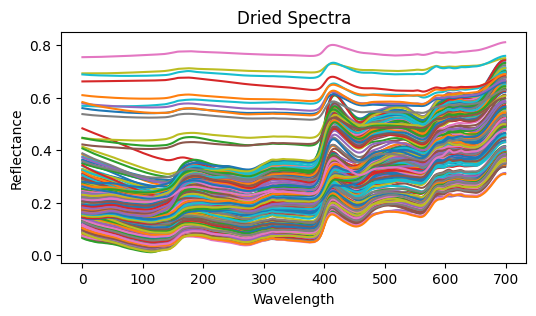

In [6]:
visualize_spectra(dried_spectra, "Dried Spectra")

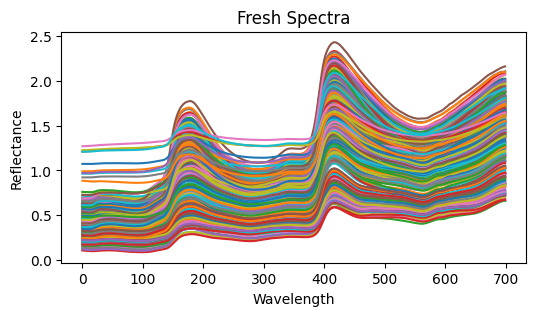

In [7]:
visualize_spectra(fresh_spectra, "Fresh Spectra")

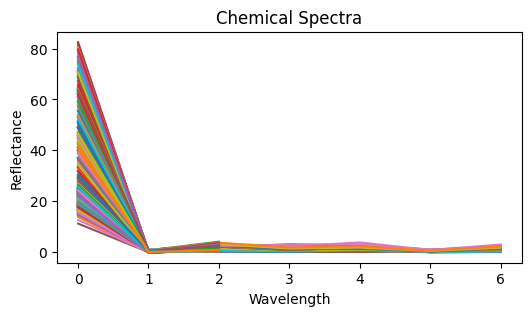

In [8]:
visualize_spectra(chemical, "Chemical Spectra")

In [9]:
# def handle_missing_data(matrix):
#     missing_columns = matrix.isnull().any()

#     for column in missing_columns.index:
#         if missing_columns[column]:
#             num_missing = matrix[column].isnull().sum()

#             if num_missing > 0:
#                 if matrix[column].dtype.kind in 'biufc':
#                     column_mean = matrix[column].mean()
#                     matrix[column].fillna(column_mean, inplace=True)
#                 else:
#                     most_frequent_value = matrix[column].mode().iloc[0]
#                     matrix[column].fillna(most_frequent_value, inplace=True)

#     return matrix.values

In [10]:
# dried_spectra = handle_missing_data(dried_spectra_df)
# fresh_spectra = handle_missing_data(fresh_spectra_df)
# chemical = handle_missing_data(chemical_df)

In [11]:
# def preprocess_data(matrix):
#     numeric_columns = matrix.select_dtypes(include=[np.number]).columns
#     matrix = matrix[numeric_columns]

#     matrix = matrix.apply(pd.to_numeric, errors='coerce')

#     matrix = matrix.dropna()

#     return matrix

# def apply_pca(matrix, n_components):
#     pca = PCA(n_components=n_components)
#     transformed_matrix = pca.fit_transform(matrix)
#     return transformed_matrix

# dried_spectra_processed = preprocess_data(dried_spectra_df)
# fresh_spectra_processed = preprocess_data(fresh_spectra_df)
# chemical_processed = preprocess_data(chemical_df)

# dried_spectra = dried_spectra_processed.values[:, 1:]
# fresh_spectra = fresh_spectra_processed.values[:, 1:]
# chemical = chemical_processed.values[:, 1:]

# dried_spectra_transformed = apply_pca(dried_spectra, n_components=2)
# fresh_spectra_transformed = apply_pca(fresh_spectra, n_components=2)
# chemical_transformed = apply_pca(chemical, n_components=2)


In [12]:
# def mean_centering(data):
#     mean = np.mean(data, axis=1)
#     centered_data = data - mean[:, np.newaxis]
#     return centered_data

# def savitzky_golay_smoothing(data, window_size, polyorder):
#     window_size = min(window_size, data.shape[1] - 1)
#     polyorder = min(polyorder, window_size - 1)
#     smoothed_data = np.zeros_like(data)
#     for i in range(data.shape[0]):
#         smoothed_data[i] = savgol_filter(data[i], window_size, polyorder)
#     return smoothed_data

# def standard_normal_variate(data):
#     mean = np.mean(data, axis=1)
#     std = np.std(data, axis=1)
#     normalized_data = (data - mean[:, np.newaxis]) / std[:, np.newaxis]
#     return normalized_data

# def normalization(data):
#     min_val = np.min(data, axis=1)
#     max_val = np.max(data, axis=1)
#     normalized_data = (data - min_val[:, np.newaxis]) / (max_val[:, np.newaxis] - min_val[:, np.newaxis])
#     return normalized_data

# dried_spectra_mc = mean_centering(dried_spectra_transformed)
# dried_spectra_sg = savitzky_golay_smoothing(dried_spectra_mc, window_size=15, polyorder=3)
# dried_spectra_snv = standard_normal_variate(dried_spectra_sg)
# dried_spectra_norm = normalization(dried_spectra_snv)

# fresh_spectra_mc = mean_centering(fresh_spectra_transformed)
# fresh_spectra_sg = savitzky_golay_smoothing(fresh_spectra_mc, window_size=15, polyorder=3)
# fresh_spectra_snv = standard_normal_variate(fresh_spectra_sg)
# fresh_spectra_norm = normalization(fresh_spectra_snv)

# chemical_mc = mean_centering(chemical_transformed)
# chemical_sg = savitzky_golay_smoothing(chemical_mc, window_size=15, polyorder=3)
# chemical_snv = standard_normal_variate(chemical_sg)
# chemical_norm = normalization(chemical_snv)

In [13]:
type_manure_df = chemical_df[['type_manure']]

data_dried = ['Dried'] * 332
df_dried = pd.DataFrame(data_dried, columns=['Dried or Fresh'])

data_fresh = ['Fresh'] * 332
df_fresh = pd.DataFrame(data_fresh, columns=['Dried or Fresh'])

merge_dried_df = pd.concat([dried_spectra_df, df_dried, type_manure_df], axis=1)

merge_fresh_df = pd.concat([fresh_spectra_df, df_fresh, type_manure_df], axis=1)

df_all = pd.concat([merge_dried_df, merge_fresh_df])

df_all['Class'] = df_all['Dried or Fresh'] + '-' + df_all['type_manure']

In [14]:
Spectra_data = df_all.drop(['sample_name','Dried or Fresh','type_manure','Class'],axis = 1).values

In [15]:
Class = df_all[['Class']].values

label_encoder = LabelEncoder()

encoded_classes = label_encoder.fit_transform(Class)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
Spectra_data

array([[0.1171151, 0.1161634, 0.1153065, ..., 0.3610516, 0.3611738,
        0.3611689],
       [0.1272666, 0.1265405, 0.1257394, ..., 0.3703281, 0.370269 ,
        0.3700591],
       [0.1461013, 0.1455033, 0.1448146, ..., 0.3877554, 0.3877242,
        0.3875806],
       ...,
       [1.2082624, 1.2083368, 1.2084932, ..., 1.8059663, 1.8090471,
        1.8121296],
       [0.5710573, 0.5703582, 0.5695085, ..., 1.5656513, 1.5675735,
        1.5692993],
       [0.8847895, 0.8841888, 0.8834763, ..., 1.549235 , 1.5515095,
        1.5535606]])

In [17]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(Spectra_data, encoded_classes)

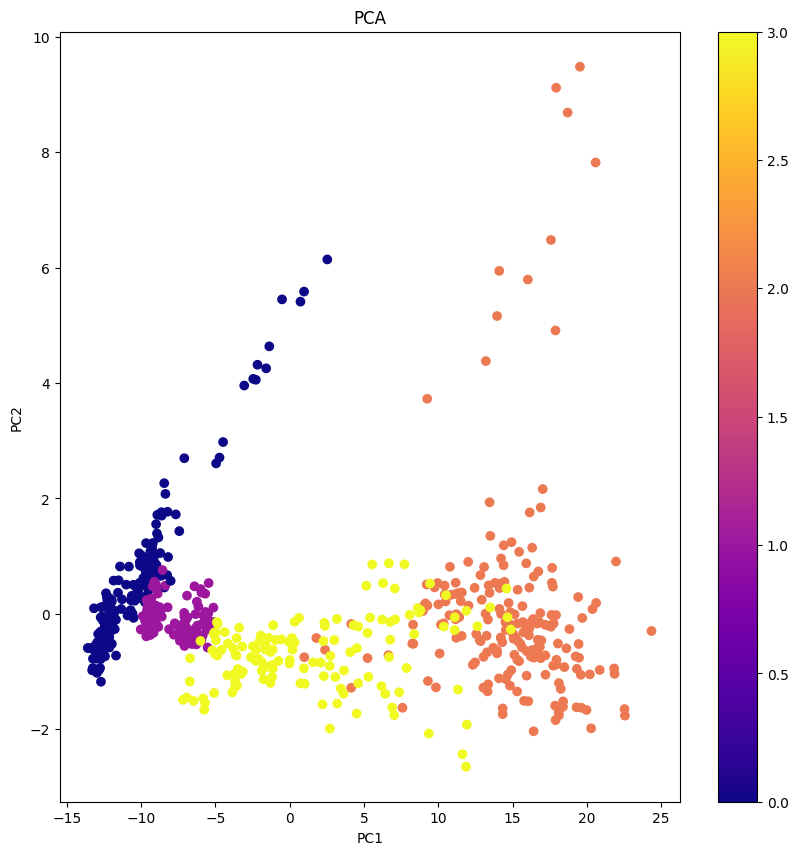

In [18]:
plt.figure(figsize=(10, 10))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=encoded_classes, cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.colorbar()
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, encoded_classes, test_size=0.4, random_state=2)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification report:\n ", classification_report(y_test, y_pred))

Accuracy:  0.9473684210526315
Confusion matrix: 
 [[78  3  0  0]
 [ 0 57  0  0]
 [ 0  0 71  3]
 [ 0  4  4 46]]
Classification report:
                precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.89      1.00      0.94        57
           2       0.95      0.96      0.95        74
           3       0.94      0.85      0.89        54

    accuracy                           0.95       266
   macro avg       0.94      0.94      0.94       266
weighted avg       0.95      0.95      0.95       266



In [21]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification report:\n ", classification_report(y_test, y_pred))

Accuracy:  0.9924812030075187
Confusion matrix: 
 [[79  2  0  0]
 [ 0 57  0  0]
 [ 0  0 74  0]
 [ 0  0  0 54]]
Classification report:
                precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.97      1.00      0.98        57
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        54

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266

